<a href="https://colab.research.google.com/github/stymgupta/playstore/blob/main/RegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

**Data Collection from Link**

In [3]:
url = "https://s3.us-west-2.amazonaws.com/public.gamelab.fun/dataset/salary_data.csv"
ds = pd.read_csv(url)
ds.shape

(30, 2)

**Print few rows of dataset**

In [4]:
ds.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


**Print a plot and visualized it with respect of x and y axis. Here, x represents Salary and y represents YearsExperience.**

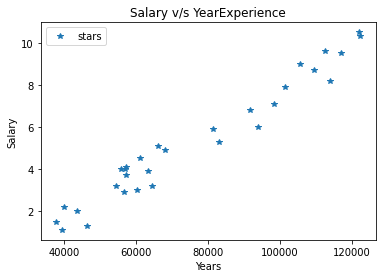

In [7]:
#Plottting the distribution of scores

ds.plot(x = "Salary", y="YearsExperience", label="stars", style="*")
plt.title("Salary v/s YearExperience")
plt.xlabel("Years")
plt.ylabel("Salary")

plt.show()

**Visualization through bar graph**

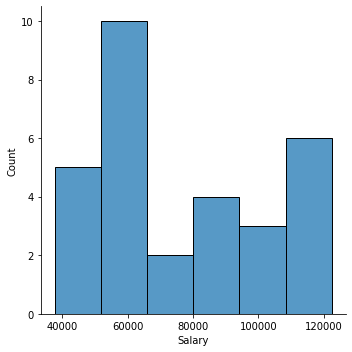

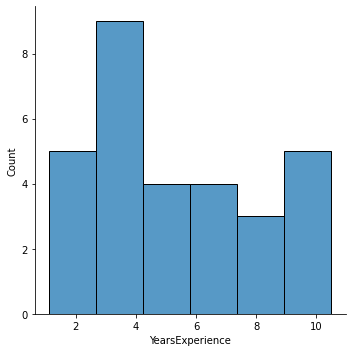

In [10]:
sns.displot(ds["Salary"])
sns.displot(ds["YearsExperience"])
plt.show()

**Check Missing Values**

In [11]:
ds.isnull().sum()
#No missing values found

YearsExperience    0
Salary             0
dtype: int64

In [15]:
#Selecting Rows and Columns by their position
X= ds.iloc[:,:-1].values
Y= ds.iloc[:,1].values

**Training the Model and Plotting the Regression Line**

In [16]:
#Splitting the data
Y_train, Y_test, X_train, X_test = train_test_split(Y,X,test_size=0.2, random_state=0)
#The train-test split is a technique for evaluating the performance of a machine learning algorithm.

In [17]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)
print("Training Completed..")

Training Completed..


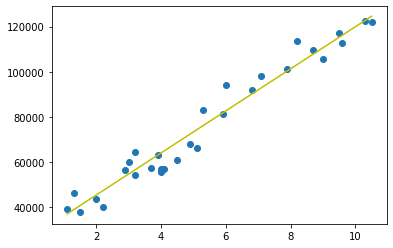

In [18]:
#Plotting the regression line
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X,Y)
plt.plot(X,line, color='y');
plt.show()

In [19]:
#Prediction Making
print(X_test)
Y_predict = regressor.predict(X_test)

[[ 1.5]
 [10.3]
 [ 4.1]
 [ 3.9]
 [ 9.5]
 [ 8.7]]


**Compare the Prediction Model Result**

In [20]:
ds =pd.DataFrame({'Actual': Y_test, 'Predicted':Y_predict})
ds

,Actual,Predicted
0,37731,40748.961841
1,122391,122699.622956
2,57081,64961.657170
3,63218,63099.142145
4,116969,115249.562855
5,109431,107799.502753


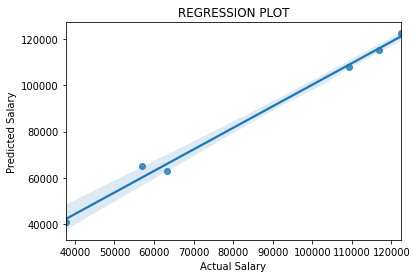

In [22]:
sns.regplot(x=Y_test, y=Y_predict)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("REGRESSION PLOT")
plt.show()

**Performance of Training and Testing Scores**

In [23]:
print("Training Score:",regressor.score(X_train,Y_train))
print("Test Score:",regressor.score(X_test,Y_test))

Training Score: 0.9411949620562126
Test Score: 0.988169515729126


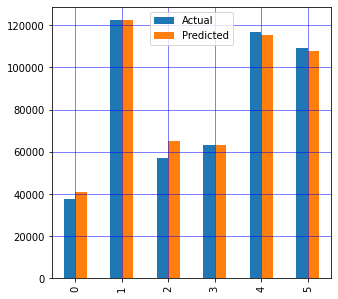

In [24]:
#for better visualization, I took the bar graph for same thing
ds.plot(kind='bar',figsize=(5,5))
plt.grid(which='major',linewidth='0.5',color='blue')
plt.grid(which='minor',linewidth='0.5',color='red')
plt.show()